# Prevendo preços de casas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
pd.set_option('max_columns', None) #comando para mostrar todas as colunas sem truncamento

In [5]:
pd.set_option('max_rows', None) #comando para mostrar todas as linhas sem truncamento 

# 1 - Descrição das colunas 

- ID - ID cada casa vendida.
- date- Data da venda da casa.
- price - Preço de cada casa vendida.
- bedrooms - Número de quartos
- bathrooms - Número de banheiros, onde 0,5 corresponde a um quarto com banheiro, mas sem chuveiro
- sqft_living - metragem quadrada do espaço interior dos apartamentos
- sqft_lot - Metragem quadrada do espaço terrestre
- floors - Número de andares
- waterfront - Uma variável fictícia para saber se o apartamento tinha vista para a beira-mar ou não
- view - Um índice de 0 a 4 de quão boa era a vista da propriedade
- condition - Um índice de 1 a 5 sobre a condição do apartamento,
- grade - Um índice de 1 a 13, onde 1-3 fica aquém da construção e design do edifício, 7 tem um nível médio de construção e design e 11-13 tem um nível de construção e design de alta qualidade.
- sqft_above - A metragem quadrada do espaço habitacional interno acima do nível do solo
- sqft_basement - A metragem quadrada do espaço habitacional interno que está abaixo do nível do solo
- yr_built - O ano em que a casa foi construída inicialmente
- yr_renovated - O ano da última reforma da casa
- CEP - CEP da casa
- lat - Latitude
- long - longitude
- sqft_living15 - A metragem quadrada do espaço interno de habitação para os 15 vizinhos mais próximos
- sqft_lot15 - A metragem quadrada dos lotes de terreno dos 15 vizinhos mais próximos

fonte: https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices

In [6]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
df.shape   #Numero de linhas e colunas do dataframe

(21613, 21)

In [8]:
df.info() #informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# 2 - Preparando os dados

In [9]:
#transformando colunas com valores inteiros em colunas categóricos 
#df['waterfront'] = df['waterfront'].astype('category')
#df['view'] = df['view'].astype('category')
#df['condition'] = df['condition'].astype('category')
#df['grade'] = df['grade'].astype('category')

In [10]:
df.info() #informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
df.isnull().sum() #verificando se há algum valor faltando

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
df.drop(['id','zipcode','date'],axis=1,inplace=True)

In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


# 3 - Analisando os dados

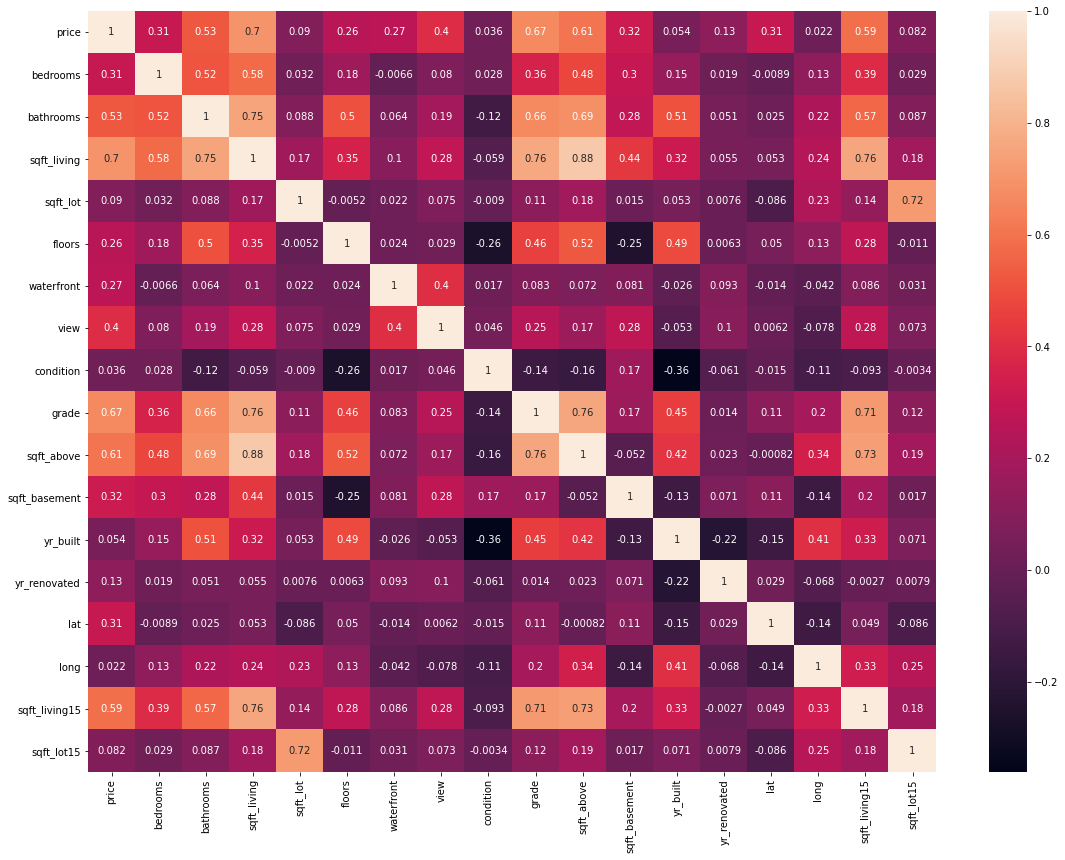

In [15]:
plt.figure(figsize = (19,14))
sns.heatmap(df.corr(),annot = True)

In [16]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


- Analisando a correlação dos dados, a linha de preço('price'), varia mais com o numero de quartos('bedrooms'), banheiros('bathroom'), metragem da casa('sqft_living'), qualidade da contrução ('grade'), se a casa tem vista para o mar ou nao ('waterfront'). 

- Vamos analisar os graficos e ver essa correlação em relação ao preço medio da casa.

# 3.1 - Numero de Quartos

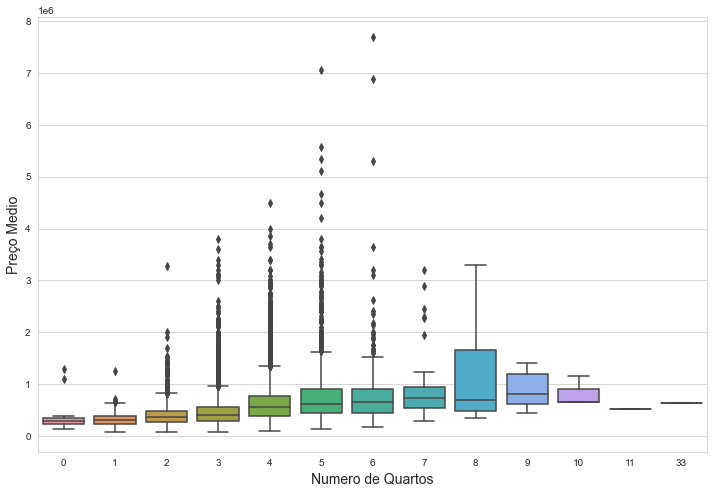

In [17]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot (x = 'bedrooms', y = 'price', data = df)
ax.xaxis.set_label_text('Numero de Quartos', fontdict = {'size':14})
ax.yaxis.set_label_text('Preço Medio', fontdict = {'size':14})
plt.show()


# 3.2 - Numero de Banheiros

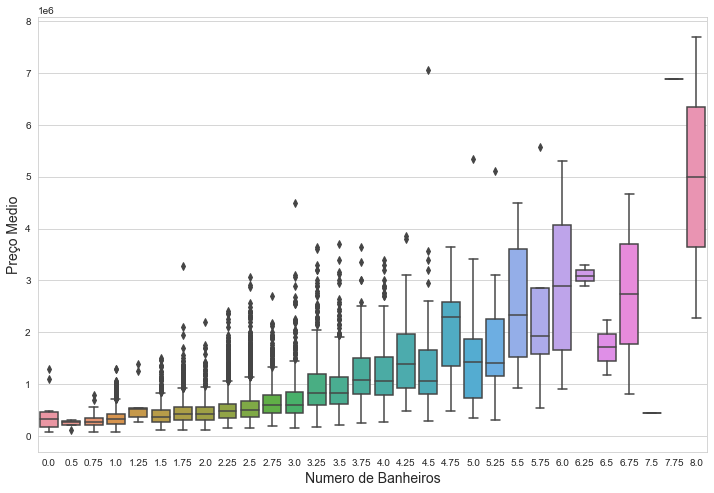

In [18]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot (x = 'bathrooms', y = 'price', data = df)
ax.xaxis.set_label_text('Numero de Banheiros', fontdict = {'size':14})
ax.yaxis.set_label_text('Preço Medio', fontdict = {'size':14})
plt.show()

# 3.3 - Metragem da casa

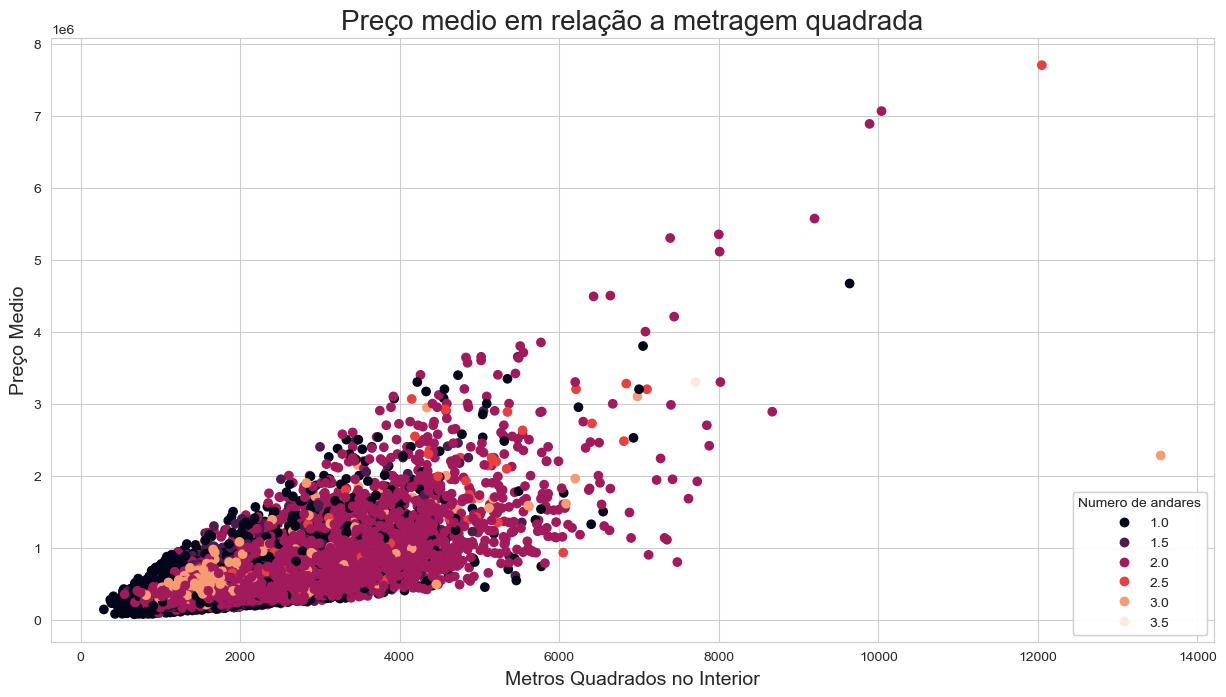

In [19]:
fig,ax = plt.subplots(figsize = (15,8), dpi = 100)
scatter = ax.scatter(df['sqft_living'], df['price'], c = df['floors'])
plt.xlabel('Metros Quadrados no Interior', fontsize = 14)
plt.ylabel('Preço Medio', fontsize = 14)
plt.title('Preço medio em relação a metragem quadrada', fontsize = 20)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Numero de andares")
ax.add_artist(legend1)


# 3.4 Qualidade da construção

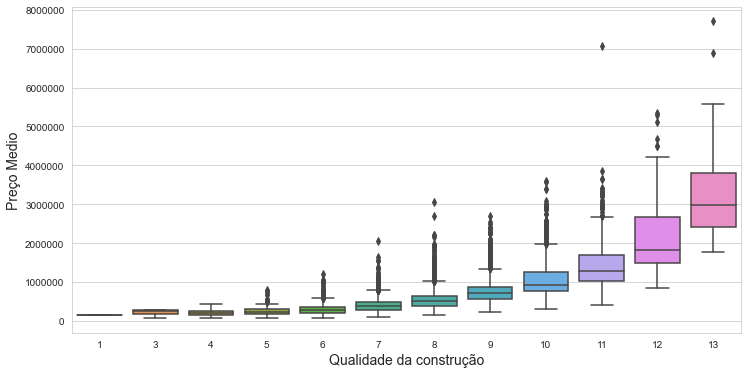

In [20]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot (x = 'grade', y = 'price', data = df,)
ax.ticklabel_format(style='plain', axis='y') #mudar a notação cientifica para normal
ax.xaxis.set_label_text('Qualidade da construção', fontdict = {'size':14})
ax.yaxis.set_label_text('Preço Medio', fontdict = {'size':14})
plt.show()

# 3.5 Vista para o mar

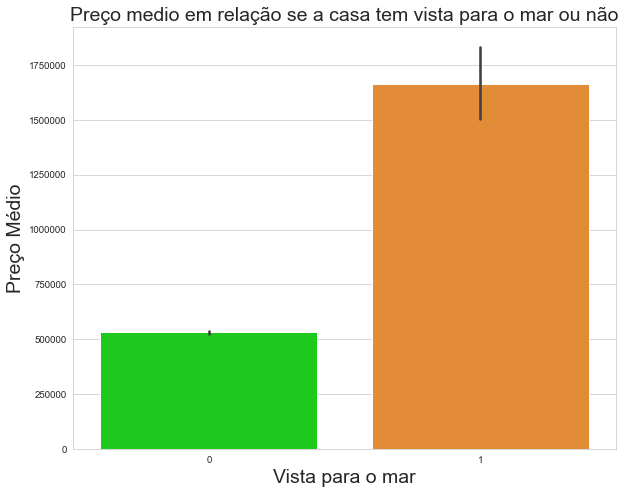

In [21]:
fig, ax = plt.subplots(figsize=(10,8), dpi = 70)
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="waterfront", y="price", palette=colors, data=df)
ax.set_title("Preço medio em relação se a casa tem vista para o mar ou não",fontdict= {'size':20})
ax.ticklabel_format(style='plain', axis='y') #mudar a notação cientifica para normal
ax.xaxis.set_label_text("Vista para o mar",fontdict= {'size':20})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':20})
plt.show()

# 4 - Treinamento dos algoritimos

In [22]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
model = []

score = []

In [24]:
def grafico(previsto,real,nome):
    previsto = np.array(previsto)
    real = np.array(real)
    
    mape = mean_absolute_error(real,previsto)
    
    y1 = previsto[:50]
    x1 = range(len(y1))
    y2 = real[:50]
    x2 = range(len(y2))
    

    plt.title('Gráfico de Predições:'+nome)
    plt.xlabel('mape: '+str(mape))
    plt.ylabel('Valores')

    plt.plot(x1,y1,color='#D90286',linestyle='--',label='Predita')
    plt.plot(x2,y2,color='#0864AD',linestyle='-.', label = 'Esperada')
    plt.legend()
    plt.show()

In [25]:
split_test_size = 0.15
#separando dados de entrada(x) e saida(y)
y = df['price']
x = df
x = x.drop(['price'],axis=1)

#split de dados
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y, test_size=split_test_size, random_state = 2 )

# 4.1 - Regressão linear

In [26]:
lr = LinearRegression()
model_lr = lr.fit(x_treino,y_treino)
resultado_lr = model_lr.predict(x_teste)


In [27]:
print("Score: ",r2_score(resultado_lr,y_teste))
model.append("Regressão linear")
score.append(r2_score(resultado_lr,y_teste))

Score:  0.6129247865136825


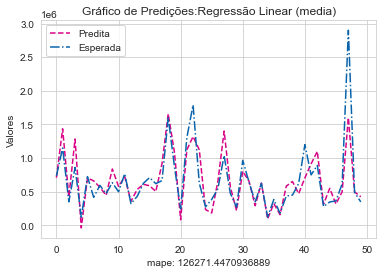

In [28]:
#imprimindo predições
grafico(resultado_lr ,y_teste,'Regressão Linear (media)')

# 4.2 - Random Forest

In [29]:
tree_rf = RandomForestRegressor(n_estimators=100, random_state = 0)
model_rf = tree_rf.fit(x_treino, y_treino)
resultado_rf = model_rf.predict(x_teste)

In [30]:
print("Score: ",r2_score(resultado_rf,y_teste))
model.append("Random Forest")
score.append(r2_score(resultado_rf,y_teste))

Score:  0.8789106089383516


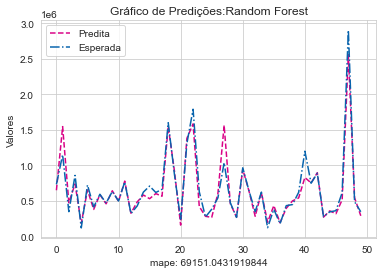

In [31]:
#imprimindo predições
grafico(resultado_rf ,y_teste,'Random Forest')

# 4.3 - k Nearest Neighbor (KNN)

In [32]:
#Teste para ver qual melhor parametro para usar no KNN 
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn_1 = KNeighborsRegressor()

model_1 = GridSearchCV(knn_1, params, cv=5)
model_1.fit(x_treino,y_treino)
model_1.best_params_

{'n_neighbors': 9}

In [33]:
knn = KNeighborsRegressor(n_neighbors = 8)
model_knn = knn.fit(x_treino, y_treino)
resultado_knn = model_knn.predict(x_teste)

In [34]:
print("Score: ",r2_score(resultado_knn,y_teste))
model.append("k Nearest Neighbor")
score.append(r2_score(resultado_knn,y_teste))

Score:  -0.023082205499677322


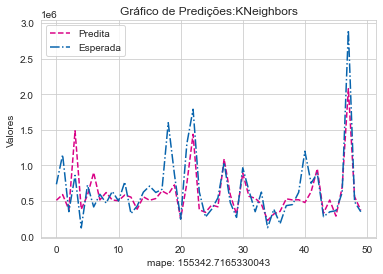

In [35]:
grafico(resultado_knn ,y_teste,'KNeighbors')

# 4.4 - GradientBoostingRegressor

In [36]:
params = {'n_estimators': 150,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.2,
          'loss': 'ls'}

In [37]:
gbr = GradientBoostingRegressor(**params)

In [38]:
gbr_model = gbr.fit(x_treino, y_treino)

In [39]:
resultado_gbr = gbr_model.predict(x_teste)

In [40]:
print("Score: ",r2_score(resultado_gbr,y_teste))
model.append("GradientBoostingRegressor")
score.append(r2_score(resultado_gbr,y_teste))

Score:  0.8953484280096828


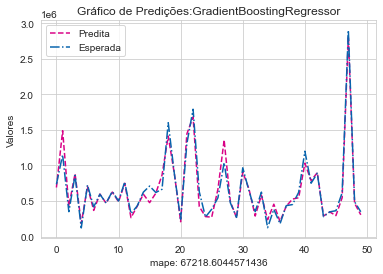

In [41]:
grafico(resultado_gbr ,y_teste,'GradientBoostingRegressor')

# 4.5 - XGBoost

In [42]:
xgboost = XGBRegressor()
xgboost_model = xgboost.fit(x_treino, y_treino)
resultado_xgboost = xgboost_model.predict(x_teste)

In [43]:
print("Score: ",r2_score(resultado_xgboost,y_teste))
model.append("XGBoost")
score.append(r2_score(resultado_xgboost,y_teste))

Score:  0.8916899372014202


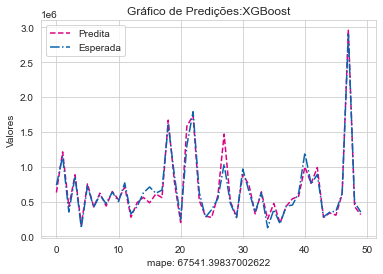

In [44]:
grafico(resultado_xgboost ,y_teste,'XGBoost')

# 5 - Conclusão

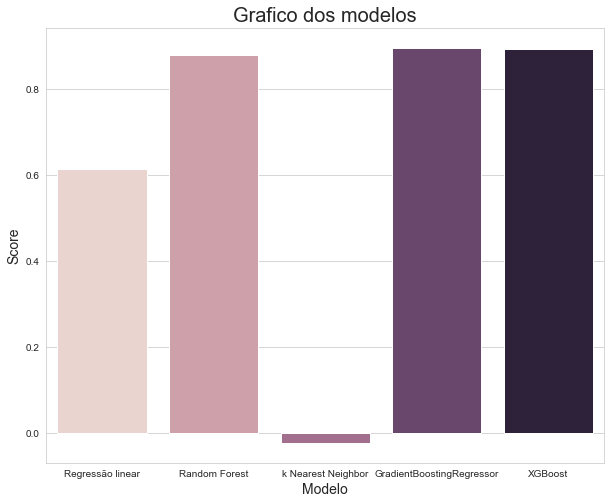

In [45]:
plt.subplots(figsize=(10, 8))
sns.barplot(y=score,x=model,palette = sns.cubehelix_palette(len(score)))
plt.xlabel("Modelo",fontsize = 14)
plt.ylabel("Score",fontsize = 14)
plt.title('Grafico dos modelos',fontsize = 20)
plt.show()

- Random Forest, gradientBoostingRegressor e XGBoost - Apresentaram os melhores resultados. Como o preço médio das casas muito agrupados, esses algoritmos conseguem ter desempenho melhor, já que conseguem diminuir os erros nas demais arvores de aprendizado.
- Regressão linear - O modelo de regressão linear apresentou um resultado intermediário comparado aos outros modelos, era de se esperar, já que conforme vimos nos gráficos o preço da casa segue uma linearidade com os outros parâmetros, porém temos muitos pontos dispersados, causando uma certa imprecisão do modelo
- K Nearest Neighbor - apresentou o pior resultado, o que era de se esperar também, devido ao agrupado dos itens, o modelo não consegue uma precisão muito boa, já que é baseado nos valores de seus respectivos "vizinhos"
